# Seattle Crime Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

seattle = pd.read_csv('../../Data/seattle-crime-stats-by-1990-census-tract-1996-2007.csv')
# seattle_police = pd.read_csv('../../Data/seattle-crime-stats-by-police-precinct-2008-present.csv')

In [2]:
seattle

Report_Year  Census_Tract_1990               Crime_Type  \
0             1996                1.0       Aggravated Assault   
1             1996                1.0                 Homicide   
2             1996                1.0  NonResidential Burglary   
3             1996                1.0    Property Crimes Total   
4             1996                1.0                     Rape   
...            ...                ...                      ...   
14263         2007               99.0                     Rape   
14264         2007               99.0     Residential Burglary   
14265         2007               99.0                  Robbery   
14266         2007               99.0                    Theft   
14267         2007               99.0            Vehicle Theft   

       Report_Year_Total  
0                     11  
1                      0  
2                     41  
3                    430  
4                      2  
...                  ...  
14263                  4  
14264                 36  
14265                  3  
14266                147  
14267                 52  

[14268 rows x 4 columns]

## Crimes' Total Instances Each Year

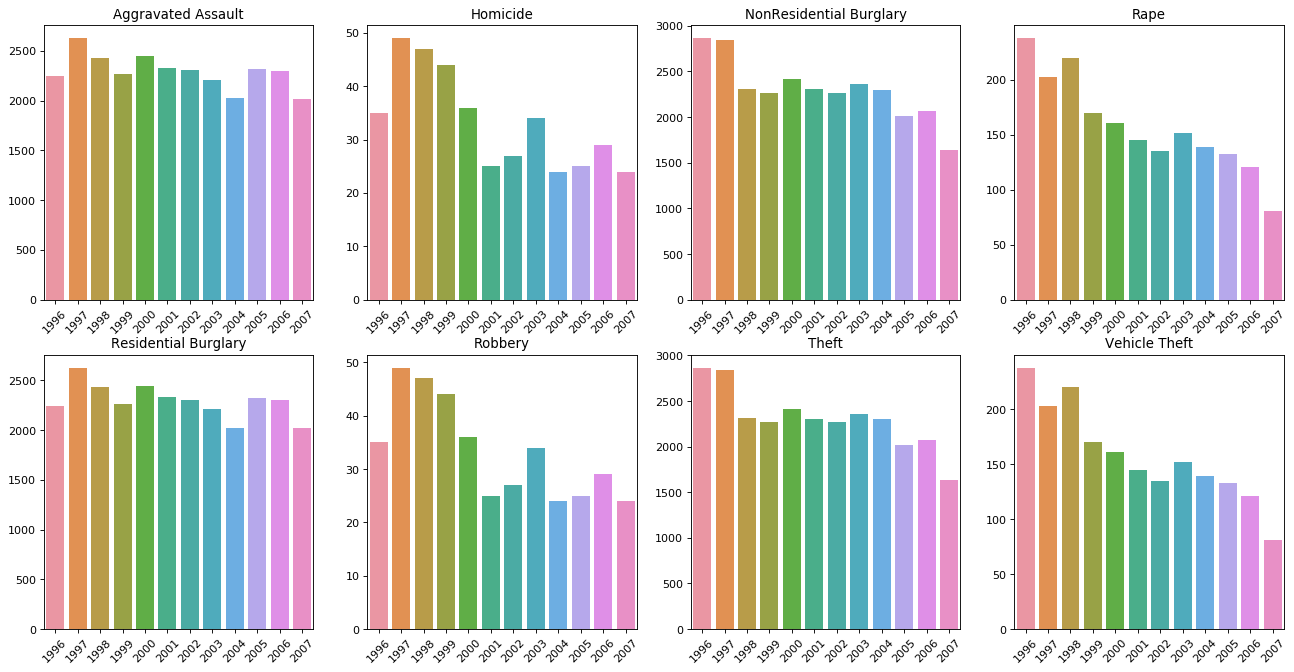

In [3]:
crimes_individual = seattle[(seattle['Crime_Type'] != 'Property Crimes Total') & (seattle['Crime_Type'] != 'Violent Crimes Total')]
crimes = crimes_individual['Crime_Type'].unique()
    
fig, axs = plt.subplots(2, 4, num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

for index in range(len(crimes)//2):
    crime = crimes[index]
    df = crimes_individual[crimes_individual['Crime_Type'] == crime]
    years = df['Report_Year'].unique()
    years_total = [df[df['Report_Year'] == year]['Report_Year_Total'].sum() for year in years]
    axs[0][index].title.set_text(crime)
    for tick in axs[0][index].get_xticklabels():
        tick.set_rotation(45)
    sn.barplot(years, years_total, ax=axs[0][index])
    
    crime2 = crimes[index+4]
    df2 = crimes_individual[crimes_individual['Crime_Type'] == crime]
    years2 = df['Report_Year'].unique()
    years_total2 = [df[df['Report_Year'] == year]['Report_Year_Total'].sum() for year in years]
    axs[1][index].title.set_text(crime2)
    for tick in axs[1][index].get_xticklabels():
        tick.set_rotation(45)
    sn.barplot(years2, years_total2, ax=axs[1][index])
    

## Property and Violent Crimes Totals

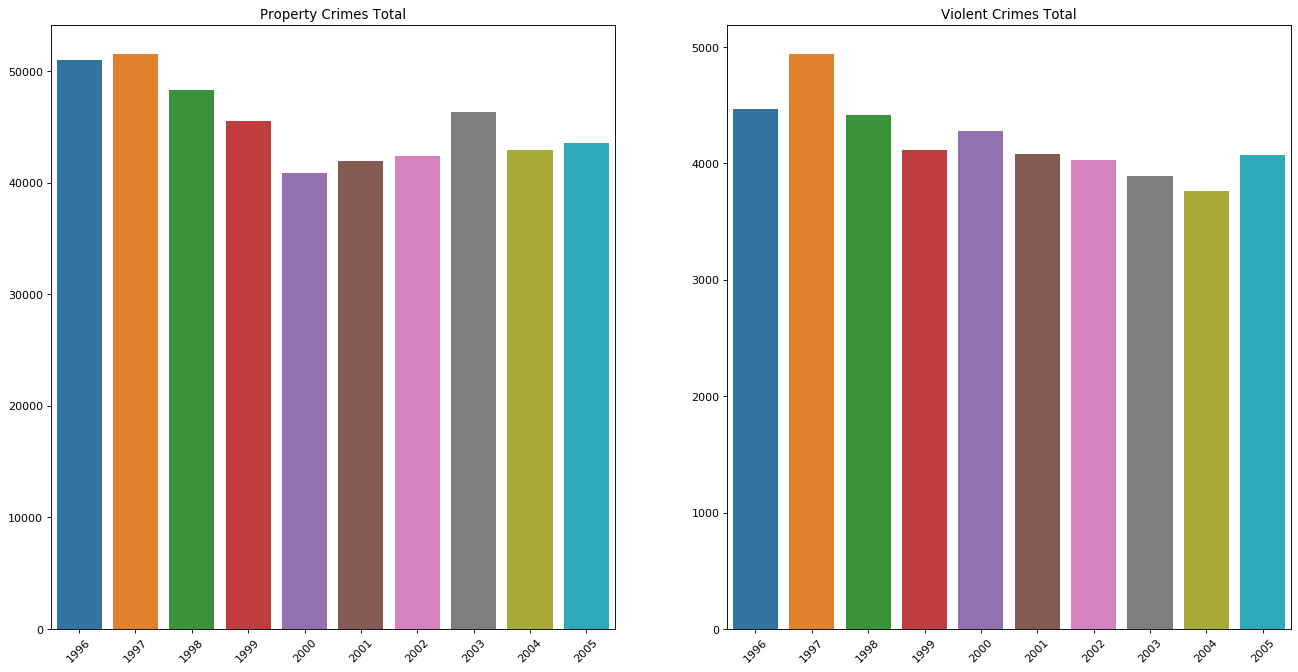

In [16]:
crimes_total = seattle[(seattle['Crime_Type'] == 'Property Crimes Total') | (seattle['Crime_Type'] == 'Violent Crimes Total')]
crimes = crimes_total['Crime_Type'].unique()
    
fig, axs = plt.subplots(1, 2, num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

for index in range(len(crimes)):
    crime = crimes[index]
    df = crimes_total[crimes_total['Crime_Type'] == crime]
    years = df['Report_Year'].unique()
    years_total = [df[df['Report_Year'] == year]['Report_Year_Total'].sum() for year in years]
    axs[index].title.set_text(crime)
    for tick in axs[index].get_xticklabels():
        tick.set_rotation(45)
    sn.barplot(years, years_total, ax=axs[index])